In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#import nuflux
import pandas as pd
import uproot
import itertools
import astropy as ap

from astropy.coordinates import SkyCoord
import astropy.units as u

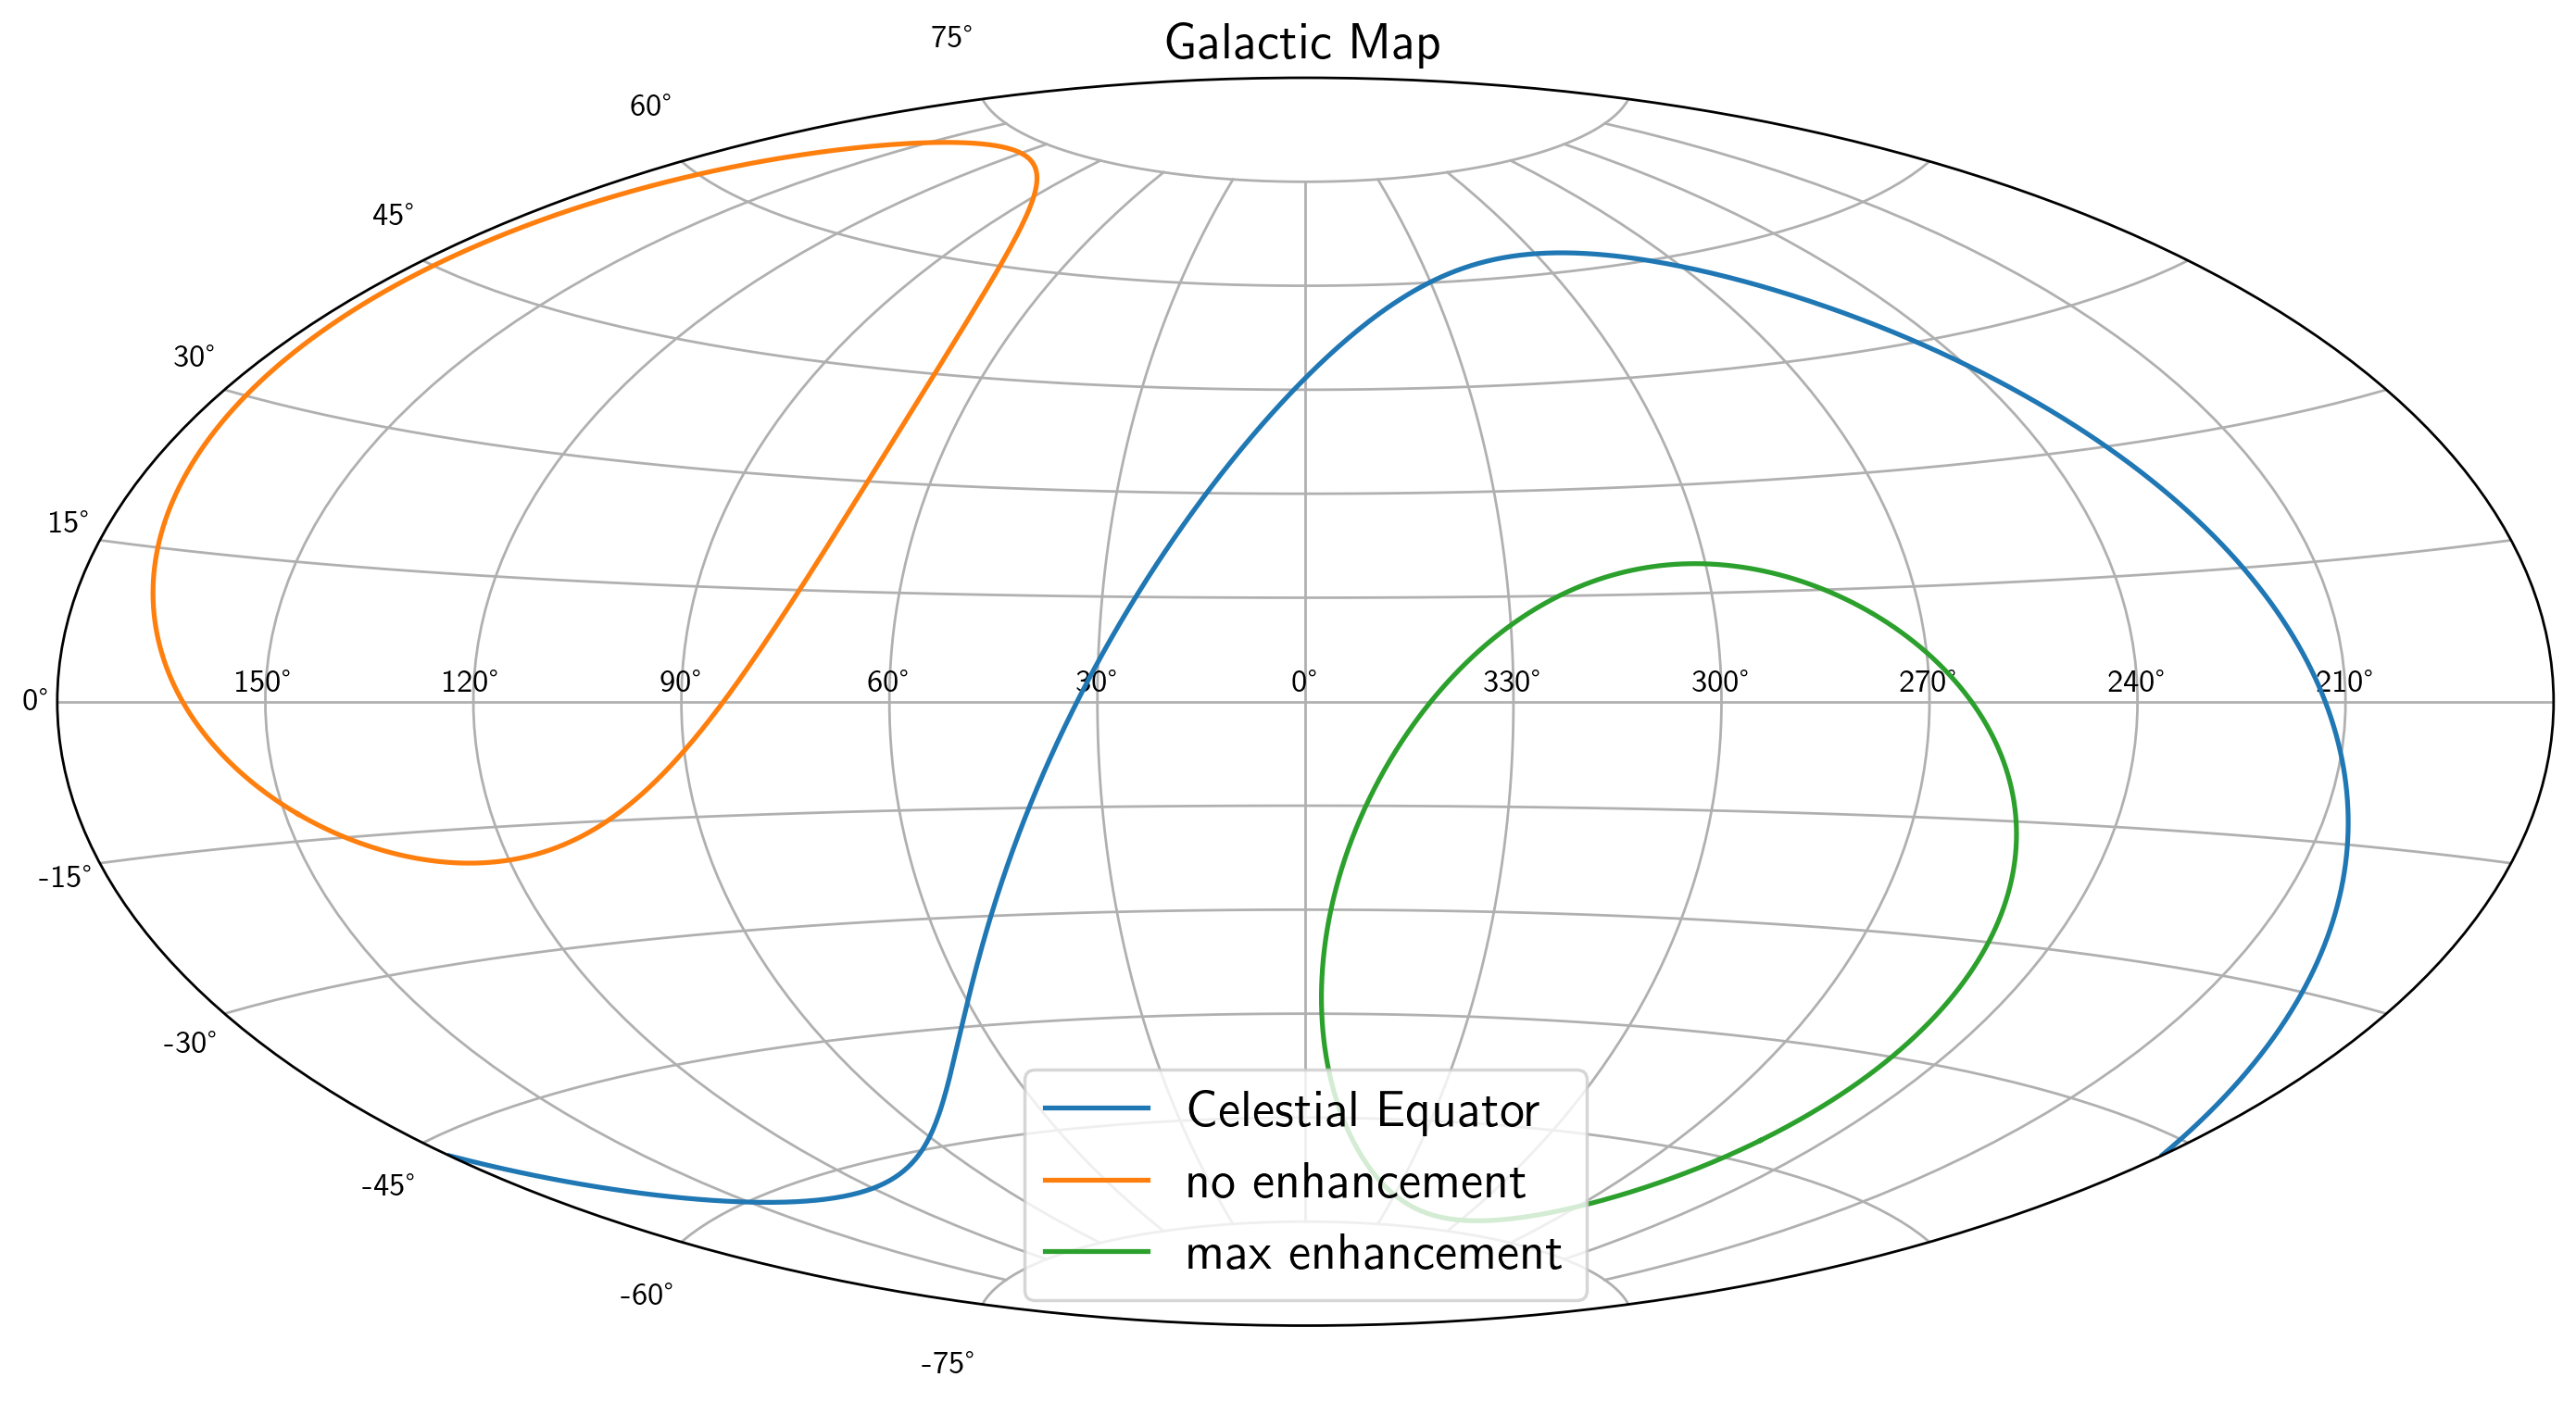

In [6]:
def eq2gal(ra, dec):
    
    '''
    Transforms equatorial coordinates to galactic ones.
    Then prepares them for matplotlib aitoff projection. 
    '''
    
    eq = SkyCoord(ra, dec, unit=u.deg)
    gal = eq.galactic

    # Minus appears because of “mapping from the inside” issue
    l_gal, b_gal = -gal.l.wrap_at('180d').radian, gal.b.radian
    
    return l_gal, b_gal

def ecl2gal(lon_ecl, lat_ecl):
    
    '''
    Transforms ecliptic coordinates to galactic ones.
    Then prepares them for matplotlib aitoff projection.
    '''
    
    ecl = SkyCoord(lon_ecl, lat_ecl, unit=u.deg, frame='barycentricmeanecliptic')
    gal = ecl.transform_to('galactic')

    # Minus appears because of “mapping from the inside” issue
    l_gal, b_gal = -gal.l.wrap_at('180d').radian, gal.b.radian
    
    return l_gal, b_gal

#######################################################################################
pltarray_size = 1000

# Equatorial plane
break_angle = 48
ra_all = np.linspace(break_angle-359.9, break_angle, pltarray_size)
dec_0 = np.zeros(pltarray_size)

l_eq_gal, b_eq_gal = eq2gal(ra_all, dec_0)

# Ecliptic plane
lon_ecl = np.linspace(77-359.9, 77, pltarray_size)
lat_ecl = np.zeros(pltarray_size)

l_ecl_gal, b_ecl_gal = ecl2gal(lon_ecl, lat_ecl)
#######################################################################################
CERN_dec = 46.2330 # deg north
CERN_dec_r = np.repeat(CERN_dec, pltarray_size)

l_CERN_gal, b_CERN_gal = eq2gal(ra_all, CERN_dec_r)

#deg north
CERNbar_dec = -CERN_dec
CERNbar_dec_r = np.repeat(CERNbar_dec, pltarray_size)

l_CERNbar_gal, b_CERNbar_gal = eq2gal(ra_all, CERNbar_dec_r)
#######################################################################################

CERN_high_dec = CERN_dec - 90
CERN_high_dec_r = np.repeat(CERN_high_dec, pltarray_size)

l_CERN_high_gal, b_CERN_high_gal = eq2gal(ra_all, CERN_high_dec_r)

CERN_low_dec = -CERN_high_dec
CERN_low_dec_r = np.repeat(CERN_low_dec, pltarray_size)

l_CERN_low_gal, b_CERN_low_gal = eq2gal(ra_all, CERN_low_dec_r)



plt.figure(figsize=(14,7), dpi=250)
plt.rcParams['text.usetex'] = True

plt.subplot(111, projection='aitoff')


plt.plot(l_eq_gal, b_eq_gal, label='Celestial Equator')
#plt.plot(l_CERN_gal, b_CERN_gal, label='above CERN')
#plt.plot(l_CERNbar_gal, b_CERNbar_gal, label='below CERN')

plt.plot(l_CERN_low_gal, b_CERN_low_gal, label='no enhancement')
plt.plot(l_CERN_high_gal, b_CERN_high_gal, label='max enhancement')

#plt.plot(l_ecl_gal, b_ecl_gal, label='Ecliptic')

# Essential thing is to rename RA axis ticks to transform them to conventional format
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, \
                             30, 60, 90, 120, 150]),
           labels=['150°', '120°', '90°', '60°', '30°', '0°', \
                   '330°', '300°', '270°', '240°', '210°'])


plt.grid(True)
plt.legend(fontsize=16, loc='lower center')

plt.title('Galactic Map', fontsize='16')

plt.show()

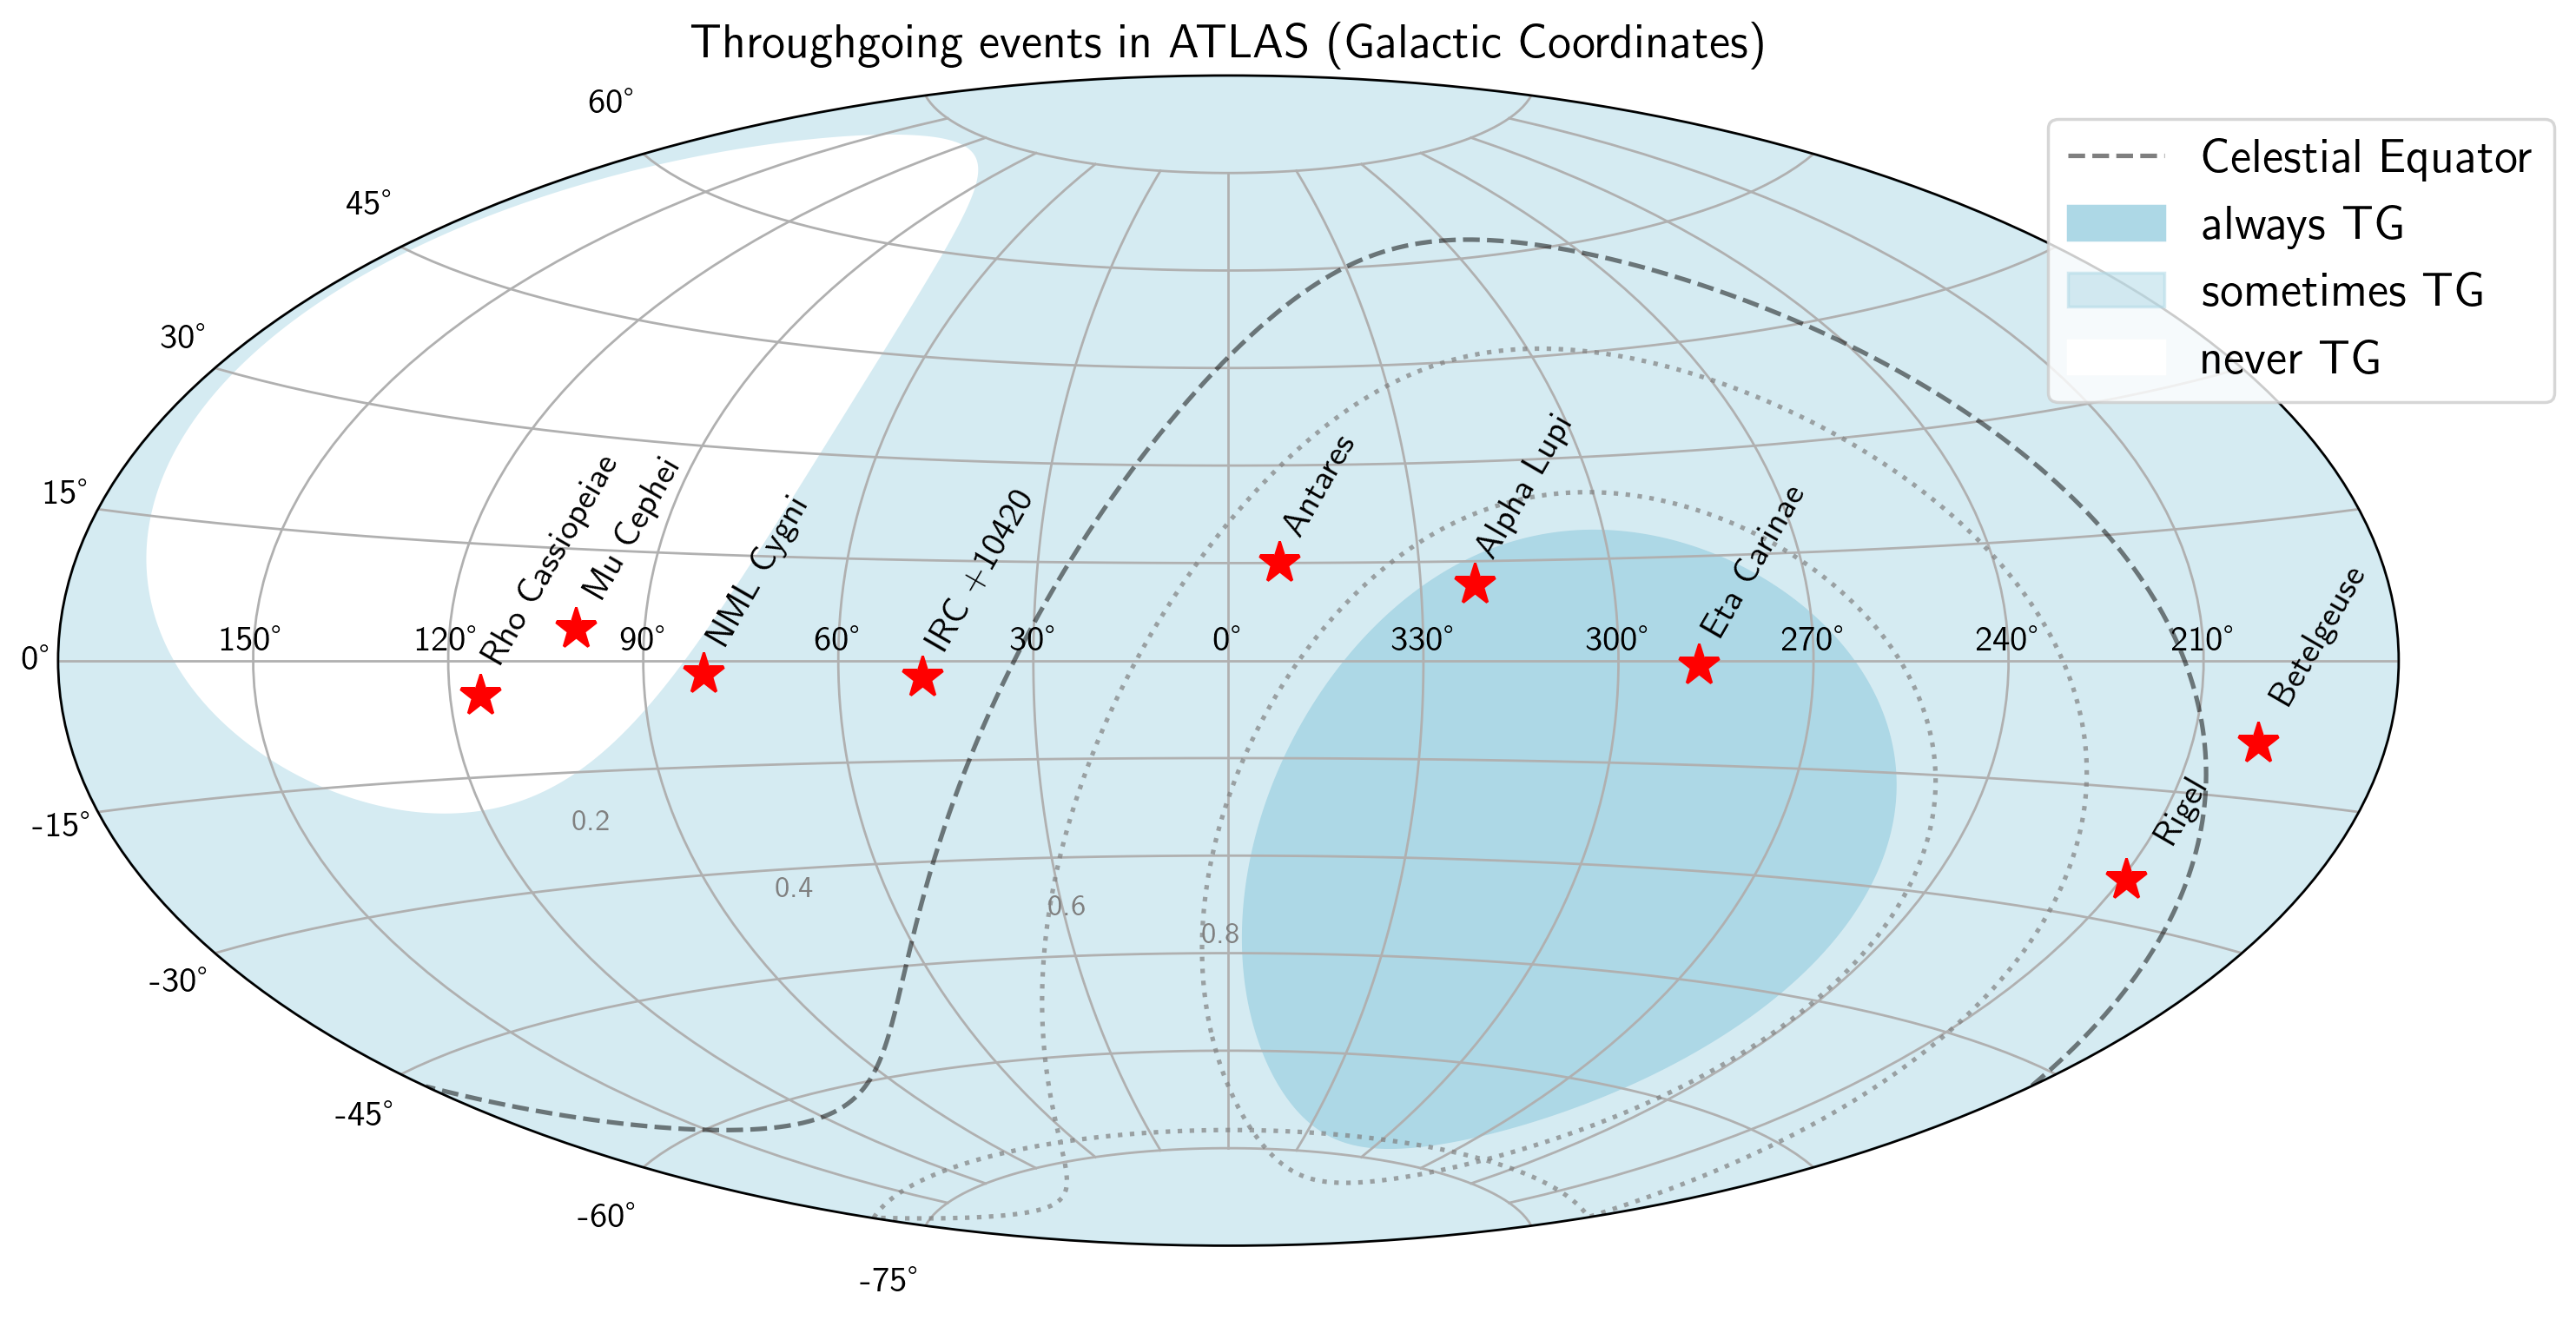

In [11]:
plt.figure(figsize=(14,7), dpi=250)
plt.rcParams['text.usetex'] = True

plt.subplot(111, projection='aitoff')


plt.plot(l_eq_gal, b_eq_gal, label='Celestial Equator', color='black', linestyle='--', alpha=0.5)

plt.fill(l_CERN_high_gal, b_CERN_high_gal, label='always TG',color='lightblue', alpha=1)
plt.fill([-np.pi, -np.pi, np.pi, np.pi], [-np.pi/2, np.pi/2, np.pi/2, -np.pi/2], label='sometimes TG',color='lightblue', alpha=0.5)
plt.fill(l_CERN_low_gal, b_CERN_low_gal, label='never TG',color='white', alpha=1)

#plt.plot(l_ecl_gal, b_ecl_gal, label='Ecliptic')

##########################################################################################
#Contours
##########################################################################################
ra_all = np.linspace(break_angle-359.9, break_angle, pltarray_size)

c20_dec = -38
c20_dec_r = np.repeat(c20_dec, pltarray_size)
l_c20, b_c20 = eq2gal(ra_all, c20_dec_r)
plt.plot(np.roll(l_c20, len(l_c20)-801), np.roll(b_c20, len(b_c20)-801), color='grey', linestyle=':', alpha=0.7)
plt.text(l_c20[int(pltarray_size*0.75)], b_c20[int(pltarray_size*0.75)], '0.8', color='grey', alpha=1)

c40_dec = -16.61585
c40_dec_r = np.repeat(c40_dec, pltarray_size)
l_c40, b_c40 = eq2gal(ra_all, c40_dec_r)
plt.plot(np.roll(l_c40, len(l_c40)-800), np.roll(b_c40, len(b_c40)-800), color='grey', linestyle=':', alpha=0.7)
plt.text(l_c40[int(pltarray_size*0.75)], b_c40[int(pltarray_size*0.75)], '0.6', color='grey', alpha=1)

c60_dec = 16.61585
c60_dec_r = np.repeat(c60_dec, pltarray_size)
l_c60, b_c60 = eq2gal(ra_all, c60_dec_r)
#plt.plot(l_c60, b_c60, color='grey', linestyle=':', alpha=0.7)
plt.text(l_c60[int(pltarray_size*0.8)], b_c60[int(pltarray_size*0.8)], '0.4', color='grey', alpha=1)

c80_dec = 38
c80_dec_r = np.repeat(c80_dec, pltarray_size)
l_c80, b_c80 = eq2gal(ra_all, c80_dec_r)
#plt.plot(l_c80, b_c80, color='grey', linestyle=':', alpha=0.7)
plt.text(l_c80[int(pltarray_size*0.85)], b_c80[int(pltarray_size*0.85)], '0.2', color='grey', alpha=1)

##########################################################################################
##########################################################################################

# Essential thing is to rename RA axis ticks to transform them to conventional format
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, \
                             30, 60, 90, 120, 150]),
           labels=['150°', '120°', '90°', '60°', '30°', '0°', \
                   '330°', '300°', '270°', '240°', '210°'], fontsize=12)
plt.yticks(ticks=np.radians([-75, -60, -45, -30, -15, 0, \
                             15, 30, 45, 60, 75]),
           labels=['-75°', '-60°', '-45°', '-30°', '-15°', '0°', \
                   '15°', '30°', '45°', '60°', ''], fontsize=12)

def hms_to_deg(hrs, mins, sec):
    return (hrs/24 + mins/1440 + sec/86400)*360

# ra in hrs, min, sec ---- dec in deg, arcmin, arcsec
SNe_list = [ ['Betelgeuse', (5,55,10.3), (7,24,25.4)],
             ['Antares', (16,29,24.5), (-26,-25,-55.4)],
             ['Rigel', (5,14,32.3), (-8,-12,-6)],
             ['Mu Cephei', (21,43,30.5), (58,46,48)],
             ['Eta Carinae', (10,45,3.6), (-59,-41,-4)],
             ['Rho Cassiopeiae', (23,54,23), (57,29,58)],
             #['HD 179821', (19,13,58.6), (0,7,32)],
             ['IRC +10420', (19,26,48.1), (11,21,17)],
             ['Alpha Lupi', (14,41,55.8), (-47,-23,-17)],
             ['NML Cygni', (20,46,25.6), (40,6,59.4)]]

for i in SNe_list: 
    ra = hms_to_deg(i[1][0], i[1][1], i[1][2])
    dec = i[2][0] + i[2][1]/60 + i[2][2]/3600
    l,b = eq2gal(ra, dec)
    plt.plot(l, b, linestyle='', marker='*', color='red', markersize=14)
    plt.text(l, b+0.075, i[0], fontsize=12, rotation=60)


plt.grid(True)
plt.legend(fontsize=16, bbox_to_anchor=(0.84, 0.7))

plt.title('Throughgoing events in ATLAS (Galactic Coordinates)', fontsize='16')

plt.savefig('skymap.pdf', dpi=300, bbox_inches='tight')

plt.show()

In [254]:
d = np.linspace(-np.pi/2, np.pi/2, 10000)
lat = 46 * np.pi/180
T = (180 - np.arccos(np.tan(lat) * np.tan(d)) * 180/np.pi ) * 100/180 

/var/folders/f7/1w1z0h9n4112y3sjt2xtgzjm0000gn/T/ipykernel_908/494319334.py:3: RuntimeWarning: invalid value encountered in arccos
  T = (180 - np.arccos(np.tan(lat) * np.tan(d)) * 180/np.pi ) * 100/180


In [257]:
d = d[~np.isnan(T)]*(180/np.pi)
T = T[~np.isnan(T)]

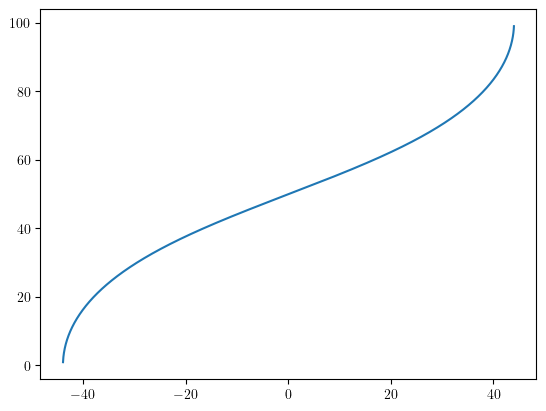

In [259]:
plt.plot(d,T)

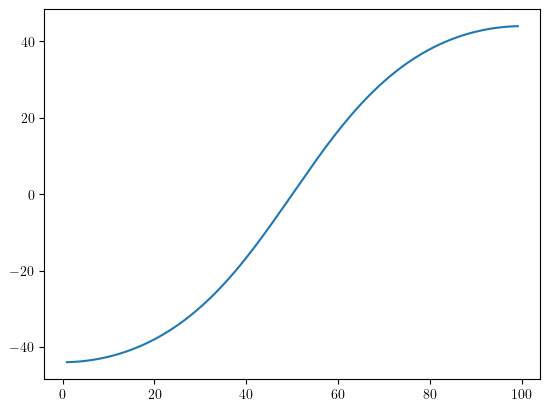

In [260]:
plt.plot(T,d)

In [261]:
np.interp([20,40,60,80], T, d)

array([-37.99903599, -16.61585197,  16.61585197,  37.99903599])